<h1 style="color:#9A11DA;"> What is a Hadamard Test?</h1> 
The Hadamard Test allows for estimating the measurment $\langle \psi | U | \psi \rangle$ for a unitary operation $U$ and a quantum state $|\psi \rangle$. In this challenge you'll be working on creating the Hadamard Test for measuring both real and imaginary values on various quantum computers. 

Here's some documentation for you to get started:

[Wikipedia](https://en.wikipedia.org/wiki/Hadamard_test_(quantum_computation))

[Victoroy Omole's Blog on QPE and Hadamard Test](https://vtomole.com/blog/2018/05/20/pea)


<h2 style="color:#9A11DA;">qBraid SDK</h2> 

qBraid-SDK is our tool to braid various quantum SDKs into one cohesive experience. With qBraid-SDK, you can develop quantum circuits and run them on quantum computers available from, IBM, Rigetti, OQC, and IonQ. You are also welcome to develop your quantum circuits in the language of your choice (qiskit, cirq, braket, or qasm) and specify the quantum device you want to run them, and qBraid-SDK will run the circuits and get you the results. qBraid-SDK includes a transpiler which allows it to convert the circuits between various languages. You can also use the transpiler for your quantum code. The SDK also has many auxiliary features that allow you to keep track of your quantum jobs and find out the status of various quantum computers. 
Learn more about the qBraid-SDK at https://qbraid-qbraid.readthedocs-hosted.com/en/latest/sdk/overview.html

<h2 style="color:#9A11DA;">Getting Started </h2>

### Add permissions and credits
1. Make sure you have added the code `QISKITFALL22` on your [account](https://account.qbraid.com/account-details)  in the **Add an access key** section.  If you already have already done this step move onto step 4.

<img align="center" width='350px' src='./images/account_details.png'>
2. You should receive a message like this:

<img align="center" width='350px' src='./images/confirmed.png'>
3. Reload this page!

## Activate the qBraid SDK environment
4. On the top right you should see the `ENVS` button. Click it!
5. Click the +ADD button and open the drop down arrow 

<img align="center"  width='100px' src='./images/add.png'>
6. Install the qBraid SDK! It will take a few minutes.

<img align="center"  width='200px' src='./images/qbraid_sdk.png'>
7. Activate the environment

<img align="center"  width='200px' src='./images/activate.png'>

8. Activate the kernel

<img align="center"  width='200px' src='./images/kernel.png'>



## You're all ready to go!
By running the cell below you will be able to run quantum jobs on qBraid. Learn more about the qBraid SDK [here](https://qbraid-qbraid.readthedocs-hosted.com/en/stable/sdk/overview.html)

### How to win
**Creativity is key here.** Try to learn about what our SDK is capable and the various applications of the hadmard test. Some ideas can be to use the two functions to make a game, extend it in the likes of the Aharonov-Jones-Landau algorithm, computing inner products and more. 

**Run on multiple simulators and devices using the qBraid SDK's transpiling and job submitting functionality is also key!**

**Write clean documentation and code** Clean code will help judges discern who understands the material and can conscisely explain it to others.

**Provide installation instructions** If there are any additional installation/getting started steps please mention them!

In [1]:
! qbraid jobs enable qbraid_sdk

You have already enabled qBraid Quantum Jobs in the qbraid_sdk environment.


In [2]:
from qiskit import QuantumRegister, ClassicalRegister

In [3]:
def hadamard_test_real():
    q = QuantumRegister(3)
    c = ClassicalRegister(3)
    qc = QuantumCircuit(q, c)

    qc.h(q[0])
    qc.ch(q[0],q[1])
    qc.cu3(np.pi/8,-np.pi/2,np.pi/2,q[0], q[2])
    qc.h(q[0])

    qc.measure(q[0], c[0])

    return qc

In [4]:
def hadamard_test_imag():
    
    qc = QuantumCircuit(3, 3)
    
    qc.h(0)
    qc.s(0)
    qc.ch(0,1)
    qc.cu3(np.pi/8,-np.pi/2,np.pi/2, 0,2)
    qc.h(0)

    qc.measure(0, 0)

    return qc

### qBraid SDK DEMO: Run on various hardware


In [5]:
from qbraid import get_devices

In [6]:
get_devices()

Provider,Name,qBraid ID,Status
AWS,Braket Default Simulator,aws_braket_default_sim,●
AWS,Density Matrix Simulator,aws_dm_sim,●
AWS,State Vector Simulator,aws_sv_sim,●
AWS,Tensor Network Simulator,aws_tn_sim,●
D-Wave,Advantage_system4,aws_dwave_advantage_system4,●
D-Wave,DW_2000Q_6,aws_dwave_2000Q_6,●
Google,Bristlecone,google_bristlecone,○
Google,Cirq Density Matrix Simulator,google_cirq_dm_sim,●
Google,Cirq Sparse Simulator,google_cirq_sparse_sim,●
Google,Foxtail,google_foxtail,○


Don't forget to add your IBMQ Key

In [7]:
from qiskit import IBMQ

In [8]:
IBMQ.save_account('afbebfe0baf45a900086734319446f45cf8be8bdb937edec5d21842909720b488bc9929b3df765adf192b484a7ae8a626893e8ac1ff44d95d0d82c9e1a057a9d')

configrc.store_credentials:WARNING:2022-10-22 22:55:06,155: Credentials already present. Set overwrite=True to overwrite.


In [9]:
from qbraid import device_wrapper, job_wrapper, get_jobs
from qbraid.api import ibmq_least_busy_qpu, verify_config

### A simple circuit

In [10]:
from qiskit import QuantumCircuit
import numpy as np

qiskit_circuit = QuantumCircuit(1, 1)

qiskit_circuit.h(0)
qiskit_circuit.ry(np.pi / 4, 0)
qiskit_circuit.rz(np.pi / 2, 0)
qiskit_circuit.measure(0, 0)

qiskit_circuit.draw()

┌───┐┌─────────┐┌─────────┐┌─┐
  q: ┤ H ├┤ Ry(π/4) ├┤ Rz(π/2) ├┤M├
     └───┘└─────────┘└─────────┘└╥┘
c: 1/════════════════════════════╩═
                                 0

#### Specify devices
We will specfiy which device we want to run in this case we will run the qiskit circuit on aws and google.

In [11]:
shots = 200
google_id = "google_cirq_dm_sim"
qbraid_google_device = device_wrapper(google_id)

aws_id = "aws_dm_sim"
qbraid_aws_device = device_wrapper(aws_id)  # Credential handled by qBraid Quantum Jobs

Let's run the circuit!!!

In [12]:
qbraid_google_job = qbraid_google_device.run(qiskit_circuit, shots=shots)
# qbraid_aws_job = qbraid_aws_device.run(qiskit_circuit, shots=shots)

#### Monitor and manage your jobs from one location

In [13]:
get_jobs()

In [14]:
# jobs = [qbraid_google_job, qbraid_aws_job]
# google_result, aws_result = [job.result() for job in jobs]
google_result = qbraid_google_job.result()

##### Get results

In [15]:
print(f"{qbraid_google_device.name} counts: {google_result.measurement_counts()}")
# print(f"{qbraid_aws_device.name} counts: {aws_result.measurement_counts()}")

Cirq Density Matrix Simulator counts: {'1': 172, '0': 28}


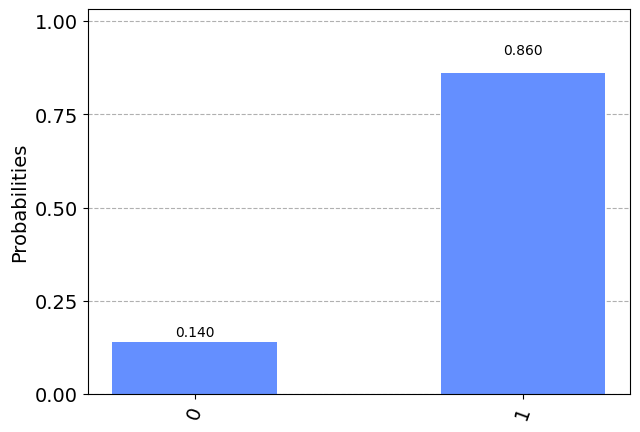

In [16]:
google_result.plot_counts()

In [17]:
# aws_result.plot_counts()

#### Example using Hadamard test real and imag functions

In [18]:
shots = 200
result_real = qbraid_google_device.run(hadamard_test_real(), shots=shots).result()

In [19]:
print(f"{qbraid_google_device.name} counts: {result_real.measurement_counts()}")

Cirq Density Matrix Simulator counts: {'0': 158, '1': 42}


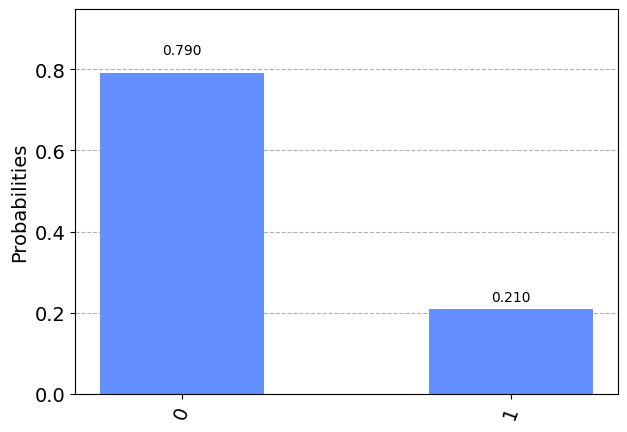

In [20]:
result_real.plot_counts()

In [21]:
shots = 200
result_imag = qbraid_google_device.run(hadamard_test_imag(), shots=shots).result()

In [22]:
print(f"{qbraid_google_device.name} counts: {result_imag.measurement_counts()}")

Cirq Density Matrix Simulator counts: {'1': 101, '0': 99}


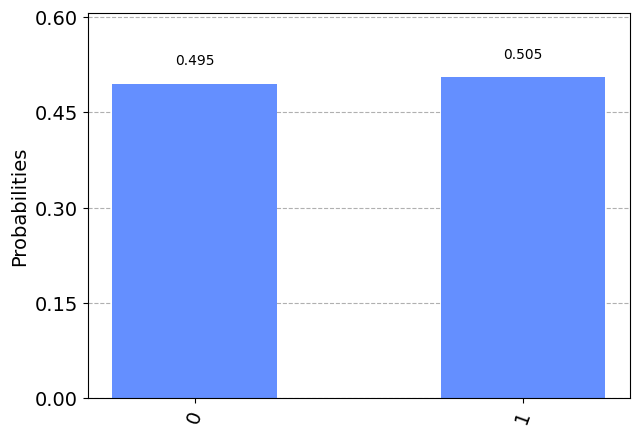

In [23]:
result_imag.plot_counts()

### It's time to develop a game

Dice have been used in games throughout the history of civilization, from ancient Egypt and Sumeria to Dungeons & Dragons. The most common form of die is the cube, with each side marked with from one to six small dots (spots). The spots are arranged in conventional patterns to represent numbers from one to six and twelve (in case of two dice usage method).

Classical Computers at best, generate pseudo-random numbers.

Quantum computers, using unique quantum property such as Superposition, to generate truly random numbers.

#### Quantum Circuit for Q Dice:

In [25]:
q = QuantumRegister(5)
c = ClassicalRegister(5)
circuit = QuantumCircuit(q,c)
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.measure(0,0)
circuit.measure(1,1)
circuit.measure(2,2)
circuit.draw()

┌───┐┌─┐      
q2_0: ┤ H ├┤M├──────
      ├───┤└╥┘┌─┐   
q2_1: ┤ H ├─╫─┤M├───
      ├───┤ ║ └╥┘┌─┐
q2_2: ┤ H ├─╫──╫─┤M├
      └───┘ ║  ║ └╥┘
q2_3: ──────╫──╫──╫─
            ║  ║  ║ 
q2_4: ──────╫──╫──╫─
            ║  ║  ║ 
c2: 5/══════╩══╩══╩═
            0  1  2

The measurement of the above with real quantum device, brings up true random value from the rolled dice.

In [27]:
shots = 200
result = qbraid_google_device.run(circuit, shots = shots).result()

In [29]:
print(f"{qbraid_google_device.name} counts: {result.measurement_counts()}")

Cirq Density Matrix Simulator counts: {'011': 25, '001': 31, '110': 33, '010': 30, '111': 18, '100': 21, '000': 19, '101': 23}


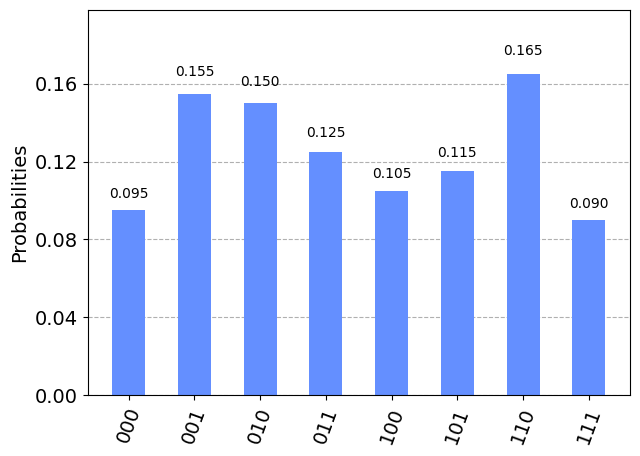

In [31]:
result.plot_counts()